In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(X_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# How to clean data
- For Convolutional Neural Network
    1. normalize data
    1. augment training dataset
- For K nearest neighbors
    1. grayscale data
    1. use k neighbors clustering to remove outliers

In [6]:
# Training set for convolutional neural network
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = (X_train, y_train), (X_test, y_test)

## Normalize data to values between 0 and 1

In [7]:
X_train_cnn, X_test_cnn = X_train_cnn/255.0, X_test_cnn/255.0

## Augment training dataset to 100,000 

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

(100000,)
(100000, 32, 32, 3)


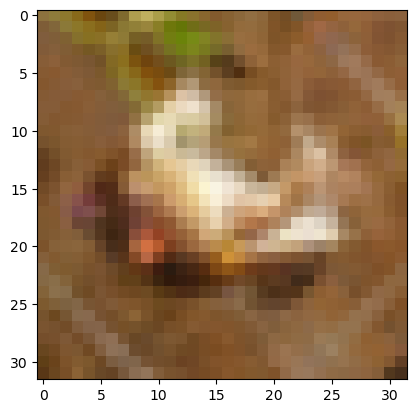

In [28]:
# plt.figure(figsize=(10, 10))
# image = X_train_cnn[5]
# print(image.shape)

# augmented_image = data_augmentation(image)
# ax = plt.subplot(3, 3, 2)
# plt.imshow(augmented_image)
# plt.axis("off")
# print(augmented_image.shape)

temp_train = np.zeros((100000, 32,32,3))
temp_test = np.zeros(100000)
for i in range(X_train_cnn.shape[0]):
    image = X_train_cnn[i]
    augmented_image = data_augmentation(image)
    temp_train[i*2] = X_train_cnn[i]
    temp_train[i*2+1] = augmented_image
    temp_test[i*2], temp_test[i*2+1] = y_train_cnn[i],y_train_cnn[i]

print(temp_test.shape)
print(temp_train.shape)


plt.imshow(temp_train[1])

6.0
6.0


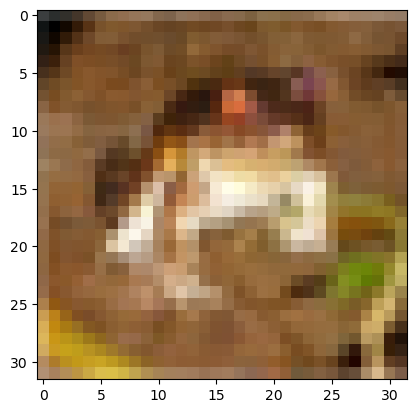

In [30]:
plt.imshow(temp_train[0])
print(temp_test[0])
print(temp_test[1])

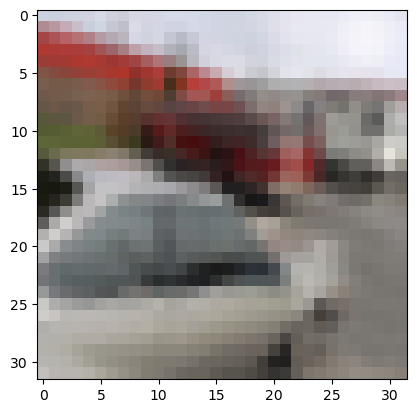

In [31]:
plt.imshow(temp_train[-1])


1.0
1.0


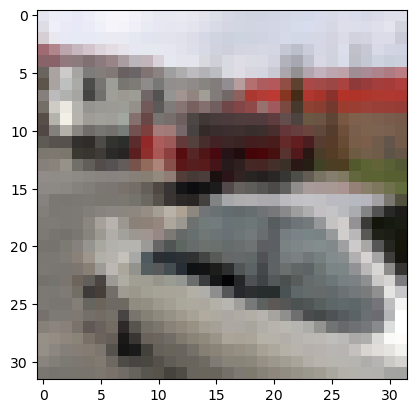

In [32]:
plt.imshow(temp_train[-2])
print(temp_test[-1])
print(temp_test[-2])

## Set our training set to temp and delete temp

In [33]:
X_train_cnn = temp_train
y_train_cnn = temp_test

print(y_train_cnn[0])
print(y_train_cnn[1])

6.0
6.0


In [34]:
del temp_test
del temp_train

## Nueral Network Architecture
- Implement Alexnet Architecture
- Hyperparameters to tune
    1. First convolutional layer window size
    1. First, second, third maxpooling layers filter size


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import keras_tuner

def build_model(hp):
    model = Sequential()
    conv_filter_1 = hp.Choice('conv_filter_1', [2, 4])
    conv_stride_1 = hp.Choice('conv_stride_1', [2,4])
    # Layer 1: Convolutional layer with 64 filters of size 11x11x3
    model.add(Conv2D(filters=64, kernel_size=(conv_filter_1, conv_filter_1), strides=(conv_stride_1,conv_stride_1), padding='valid', activation='relu', input_shape=(32,32,3)))

    # Layer 2: Max pooling layer with pool size of 3x3
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    # Layer 3-5: 3 more convolutional layers with similar structure as Layer 1
    model.add(Conv2D(filters=192, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # Layer 6: Fully connected layer with 4096 neurons
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))

    # Layer 7: Fully connected layer with 4096 neurons
    model.add(Dense(4096, activation='relu'))

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(X_train_cnn[:90000], y_train_cnn[:90000], epochs=5, validation_data=(X_train_cnn[90000:], y_train_cnn[90000:]))
best_model = tuner.get_best_models()[0]

## Test and evaluate CNN
- Confusion Matrix
- Accuracy, Precision, Recall, and F1 Score

# Clean Data for 